<a href="https://colab.research.google.com/github/Meshal-Css/T5Sd/blob/main/OCR_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D , MaxPooling2D



# dataset in keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Build the CNN Model

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=6,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 165s 349ms/step - accuracy: 0.4838 - loss: 1.9650 - val_accuracy: 0.7102 - val_loss: 1.8430
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 339ms/step - accuracy: 0.5266 - loss: 1.8645 - val_accuracy: 0.7337 - val_loss: 1.7129
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 340ms/step - accuracy: 0.5597 - loss: 1.7482 - val_accuracy: 0.7555 - val_loss: 1.5671
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 349ms/step - accuracy: 0.5922 - loss: 1.6168 - val_accuracy: 0.7717 - val_loss: 1.4137
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 341ms/step - accuracy: 0.6117 - loss: 1.4932 - val_accuracy: 0.7849 - val_loss: 1.2625
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 341ms/step - accuracy: 0.6349 - loss: 1.3672 - val_accuracy: 0.7979 - val_loss: 1.1244


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


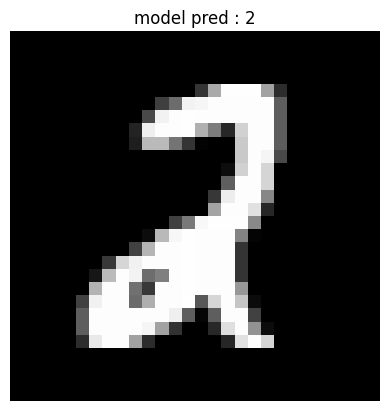

In [17]:
# random image
random_idx = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_idx]

# get the model prediction
predicted_label = model.predict(random_image.reshape(1,28,28,1)).argmax()


plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'model pred : {predicted_label}')
plt.axis('off')
plt.show()